Ibrahim Ahmed Khan 2020BCS0018

In [1]:
import pandas as pd
import numpy as np

In [2]:
store = pd.read_csv('store_sales.csv')
temp = pd.read_csv('temperature.csv')
macro = pd.read_csv('macro_economic.csv')

In [3]:
store.head()

,date,day,month,year,day_of_week,open,sales,customers,promo,state_holiday,school_holiday
0,01/01/2013,1,1,2013,2,16,94589.0,18866.0,0,1,1
1,02/01/2013,2,1,2013,3,930,5884914.0,724219.0,0,0,1
2,03/01/2013,3,1,2013,4,928,5397797.0,663772.0,0,0,1
3,04/01/2013,4,1,2013,5,928,5625456.0,680237.0,0,0,1
4,05/01/2013,5,1,2013,6,927,4972166.0,592567.0,0,0,1


In [4]:
temp.head()

,month,Avg_temp
0,1,-2.64
1,2,-0.71
2,3,3.29
3,4,8.62
4,5,14.34


In [5]:
macro.head()

,Year,GDP(Trillions),Income_per_Capita(Dollars),population(millions),Inflation_rate(percentage),Inflation_change(percentage)
0,2013,16.5,44489,316.2,1.46,-0.60
1,2014,17.2,46486,318.6,1.62,0.16
2,2015,17.8,48429,321.0,0.12,-1.50


In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            942 non-null    object 
 1   day             942 non-null    int64  
 2   month           942 non-null    int64  
 3   year            942 non-null    int64  
 4   day_of_week     942 non-null    int64  
 5   open            942 non-null    int64  
 6   sales           912 non-null    float64
 7   customers       912 non-null    float64
 8   promo           942 non-null    int64  
 9   state_holiday   942 non-null    int64  
 10  school_holiday  942 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 81.1+ KB


Firstly we merge the 'store_sales' dataset with 'temperature' and 'macro_economic' data on the basis of 'month' and 'year' respectivly, and rename some features.

In [7]:
store = pd.merge(store, temp, on='month')

In [8]:
macro = macro.rename(columns={'Year': 'year'})

In [9]:
store = pd.merge(store, macro, on='year')

In [10]:
store = store.rename(columns={'Avg_temp_x': 'avg_temp', 'Income_per_Capita(Dollars)': 'Income', 'Inflation_rate(percentage)': 'Inflation'})

We don't require features which are repetitive and which doesn't affect the model much.

Number of Customers is highly correlated to sale figures, and we dont know the number of customers in the month of july 2015 so we drop this feature.

In [11]:
store = store.drop(columns=['date', 'day', 'month', 'year', 'customers', 'GDP(Trillions)', 'population(millions)', 'Inflation_change(percentage)'])

Created testing data which contains the data of the month July in 2015, which we need to predict

In [12]:
testing = store[store['sales'].isna()]

In [13]:
store = store[~store['sales'].isna()]

In [14]:
store.head()

,day_of_week,open,sales,promo,state_holiday,school_holiday,Avg_temp,Income,Inflation
0,2,16,94589.0,0,1,1,-2.64,44489,1.46
1,3,930,5884914.0,0,0,1,-2.64,44489,1.46
2,4,928,5397797.0,0,0,1,-2.64,44489,1.46
3,5,928,5625456.0,0,0,1,-2.64,44489,1.46
4,6,927,4972166.0,0,0,1,-2.64,44489,1.46


We have considered all important features, now let's check whether they hold.

In [15]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 911
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     912 non-null    int64  
 1   open            912 non-null    int64  
 2   sales           912 non-null    float64
 3   promo           912 non-null    int64  
 4   state_holiday   912 non-null    int64  
 5   school_holiday  912 non-null    int64  
 6   Avg_temp        912 non-null    float64
 7   Income          912 non-null    int64  
 8   Inflation       912 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 71.2 KB


In [16]:
store.describe()

,day_of_week,open,sales,promo,state_holiday,school_holiday,Avg_temp,Income,Inflation
count,912.000000,912.000000,9.120000e+02,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,3.996711,775.517544,5.434012e+06,0.381579,0.029605,0.206140,9.047774,46074.509868,1.256623
std,2.000272,340.109438,2.728459e+06,0.486041,0.169589,0.404754,8.576125,1477.342601,0.572342
min,1.000000,15.000000,9.458900e+04,0.000000,0.000000,0.000000,-2.640000,44489.000000,0.120000
25%,2.000000,928.000000,4.959635e+06,0.000000,0.000000,0.000000,-0.710000,44489.000000,1.460000
50%,4.000000,932.000000,5.639772e+06,0.000000,0.000000,0.000000,8.620000,46486.000000,1.460000
75%,6.000000,934.000000,7.084768e+06,1.000000,0.000000,0.000000,16.820000,46486.000000,1.620000
max,7.000000,934.000000,1.337231e+07,1.000000,1.000000,1.000000,21.820000,48429.000000,1.620000


In [17]:
store.isnull().sum()

day_of_week       0
open              0
sales             0
promo             0
state_holiday     0
school_holiday    0
Avg_temp          0
Income            0
Inflation         0
dtype: int64

In [18]:
store.duplicated().sum()

0

No duplicate and null value found.

In [19]:
pd.value_counts(store.day_of_week)

2    131
3    131
4    130
5    130
6    130
7    130
1    130
Name: day_of_week, dtype: int64

In [20]:
pd.value_counts(store.promo)

0    564
1    348
Name: promo, dtype: int64

In [21]:
pd.value_counts(store.state_holiday)

0    885
1     27
Name: state_holiday, dtype: int64

In [22]:
pd.value_counts(store.school_holiday)

0    724
1    188
Name: school_holiday, dtype: int64

We find very few state_holidays, which are not found within the month of july

**Data Visualization**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

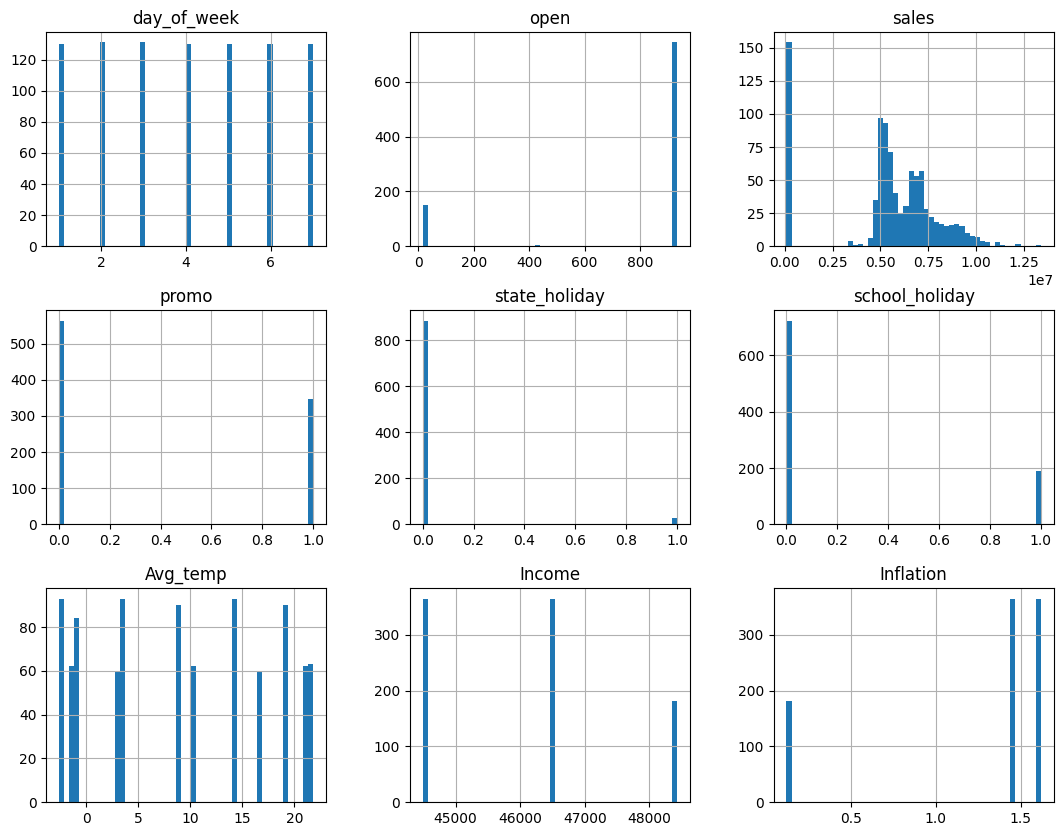

In [24]:
store.hist(bins=50, figsize=(13,10))
plt.show()

<BarContainer object of 912 artists>

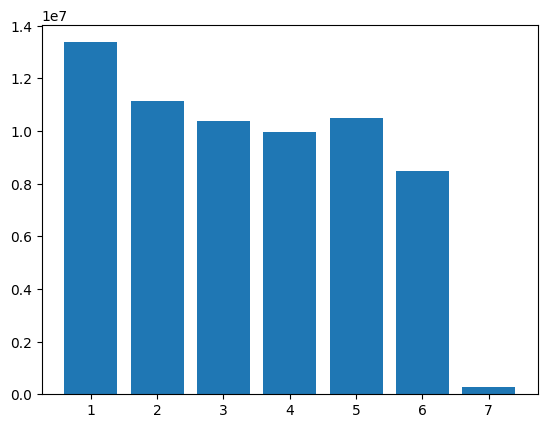

In [25]:
plt.bar(store['day_of_week'], store['sales'])

Very few days in day'7', which means fewer sales on that day

<BarContainer object of 912 artists>

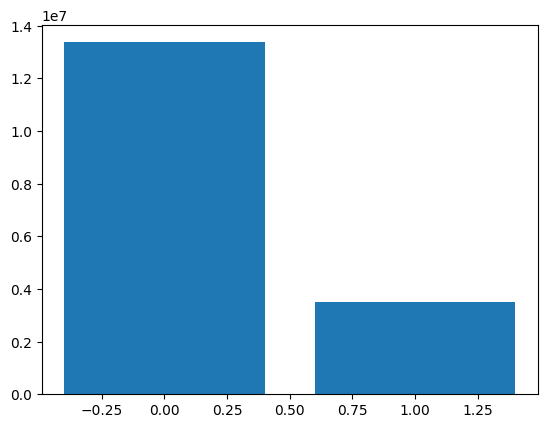

In [26]:
plt.bar(store['state_holiday'], store['sales'])

<BarContainer object of 912 artists>

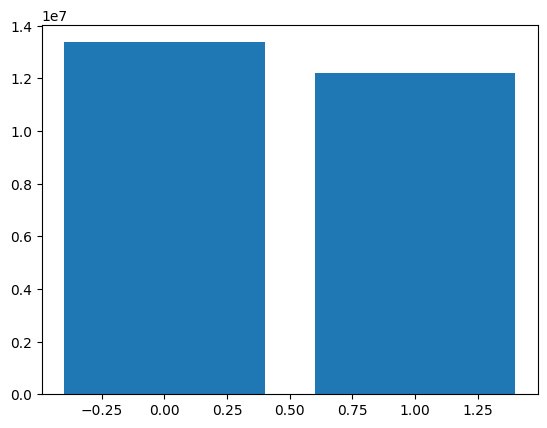

In [27]:
plt.bar(store['school_holiday'], store['sales'])

<BarContainer object of 912 artists>

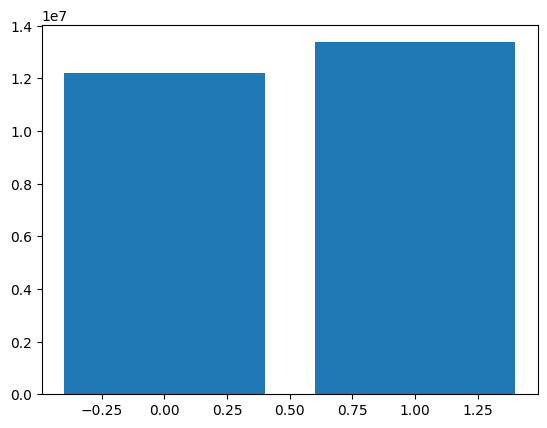

In [28]:
plt.bar(store['promo'], store['sales'])

<Axes: xlabel='open', ylabel='sales'>

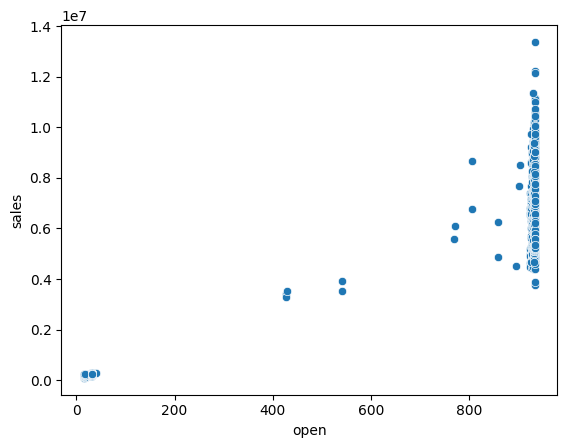

In [29]:
sns.scatterplot(x = store['open'], y = store['sales'])

<BarContainer object of 912 artists>

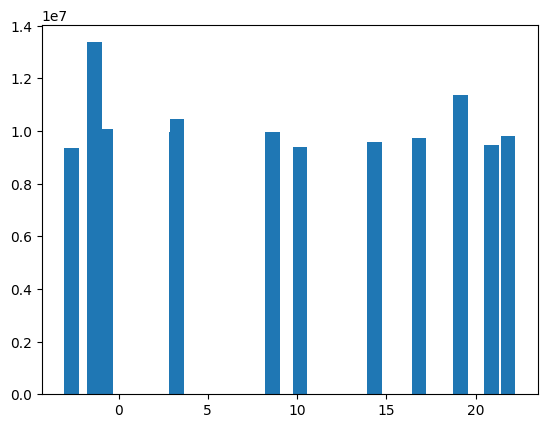

In [30]:
plt.bar(store['Avg_temp'], store['sales'])

<Axes: >

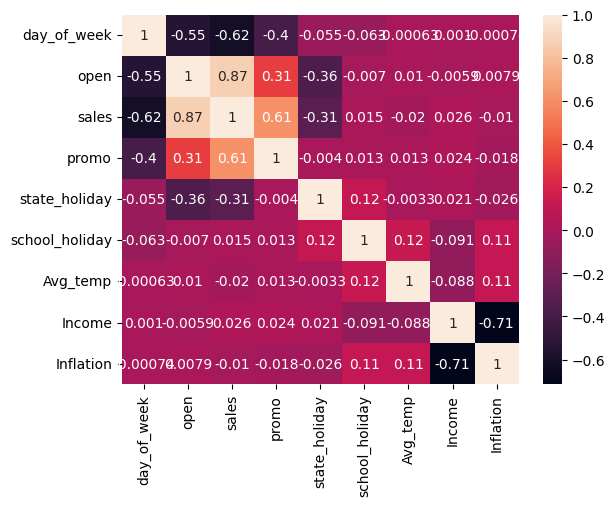

In [31]:
sns.heatmap(store.corr(),annot=True)

We find that School_holiday, Avg_temp, Income and Inflation has minimal effect on sales (less Correlation).

**Model Building**

In [32]:
X = store.drop(columns='sales')
y = store['sales']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
r2_score(y_test,y_pred)

0.9031490633397405

We get the accuracy of 90%, which means the model performed well.

Testing for the month of July.

In [43]:
testing = testing.drop(columns='sales')

In [44]:
testing.head()

,day_of_week,open,promo,state_holiday,school_holiday,Avg_temp,Income,Inflation
912,4,934,1,0,0,21.82,48429,0.12
913,5,934,1,0,0,21.82,48429,0.12
914,6,934,0,0,0,21.82,48429,0.12
915,7,32,0,0,0,21.82,48429,0.12
916,1,934,0,0,0,21.82,48429,0.12


In [45]:
model.predict(testing)

array([7504615.27003363, 7327318.25795813, 5118916.25598134,
        183796.60195833, 6005401.31635884, 5828104.30428334,
       5650807.29220784, 5473510.28013234, 5296213.26805684,
       5113641.50804127,  178521.85401825, 8031231.55832005,
       7853934.54624455, 7676637.53416905, 7494065.77415348,
       7316768.76207798, 5108366.76010119,  178521.85401825,
       5994851.82047869, 5817554.80840319, 5640257.79632769,
       5462960.78425219, 5285663.77217669, 5108366.76010119,
        178521.85401825, 8208078.77153543, 8030781.75945993,
       7853484.74738443, 7676187.73530893, 7498890.72323343])

We find the Sale figures for the month of July, from 2nd to 31th.